In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('../Dataset/modaEmergActua.csv')

In [104]:
print(df.head())

   id_marca          nombre  ano_creacion                        categoria  \
0         1  Palida studios          2019               Streetwear, Urbano   
1         2    Tony Delfino          2008       Casual, Urbano, Streetwear   
2         3            Wavy          2021               Streetwear, Urbano   
3         4         Egoista          2022  Streetwear, Urbano, Alternativo   
4         5        Laminero          2022                       Streetwear   

                        ciudad_base disponibilidad  precios_promedio  \
0  Nezahualcoyotl, Estado de México          Ambos             750.0   
1          Ciudad de México, Centro          Ambos            1100.0   
2                  Ciudad de México          Ambos             700.0   
3        Ecatepec, Estado de México          Ambos             600.0   
4                  Ciudad de México         Online             700.0   

   seguidores_ig  seguidores_tt  
0          12400           1914  
1         114000           187

df = df.drop('engagement_redes', axis=1)

In [107]:
print(df.head())

   id_marca          nombre  ano_creacion                        categoria  \
0         1  Palida studios          2019               Streetwear, Urbano   
1         2    Tony Delfino          2008       Casual, Urbano, Streetwear   
2         3            Wavy          2021               Streetwear, Urbano   
3         4         Egoista          2022  Streetwear, Urbano, Alternativo   
4         5        Laminero          2022                       Streetwear   

                        ciudad_base disponibilidad  precios_promedio  \
0  Nezahualcoyotl, Estado de México          Ambos             750.0   
1          Ciudad de México, Centro          Ambos            1100.0   
2                  Ciudad de México          Ambos             700.0   
3        Ecatepec, Estado de México          Ambos             600.0   
4                  Ciudad de México         Online             700.0   

   seguidores_ig  seguidores_tt  
0          12400           1914  
1         114000           187

In [109]:
df.to_csv("modaEmergActua.csv", index=False)

# Año de Creación (Analisis)

### Se contabiliza cuantas marcas se crean cada año y se ordena por antiguedad ascendente

In [113]:
crecimiento = df["ano_creacion"].value_counts().sort_index()
print(crecimiento)

ano_creacion
2008     2
2012     2
2015     2
2016     3
2017     2
2018     7
2019    14
2020    15
2021    17
2022    20
2023    16
2024     4
2025     1
Name: count, dtype: int64


#### Grafico en lineas

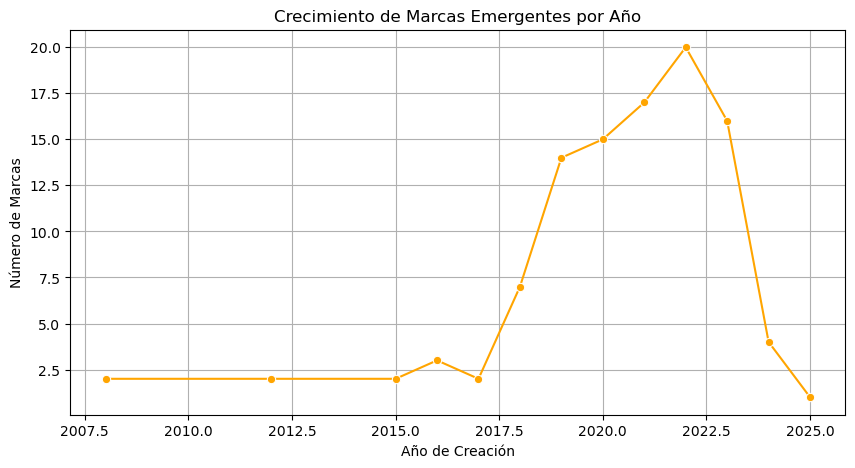

In [116]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=crecimiento.index, y=crecimiento.values, marker="o", color="orange")
plt.title("Crecimiento de Marcas Emergentes por Año")
plt.xlabel("Año de Creación")
plt.ylabel("Número de Marcas")
plt.grid(True)
plt.show()

In [118]:
df["ano_creacion"].mean()

2020.2857142857142

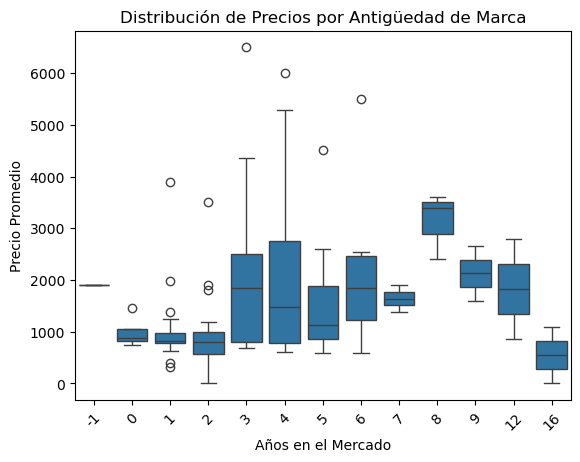

In [120]:
sns.boxplot(x=2024 - df["ano_creacion"], y=df["precios_promedio"])
plt.xticks(rotation=45)
plt.title("Distribución de Precios por Antigüedad de Marca")
plt.xlabel("Años en el Mercado")
plt.ylabel("Precio Promedio")
plt.show()


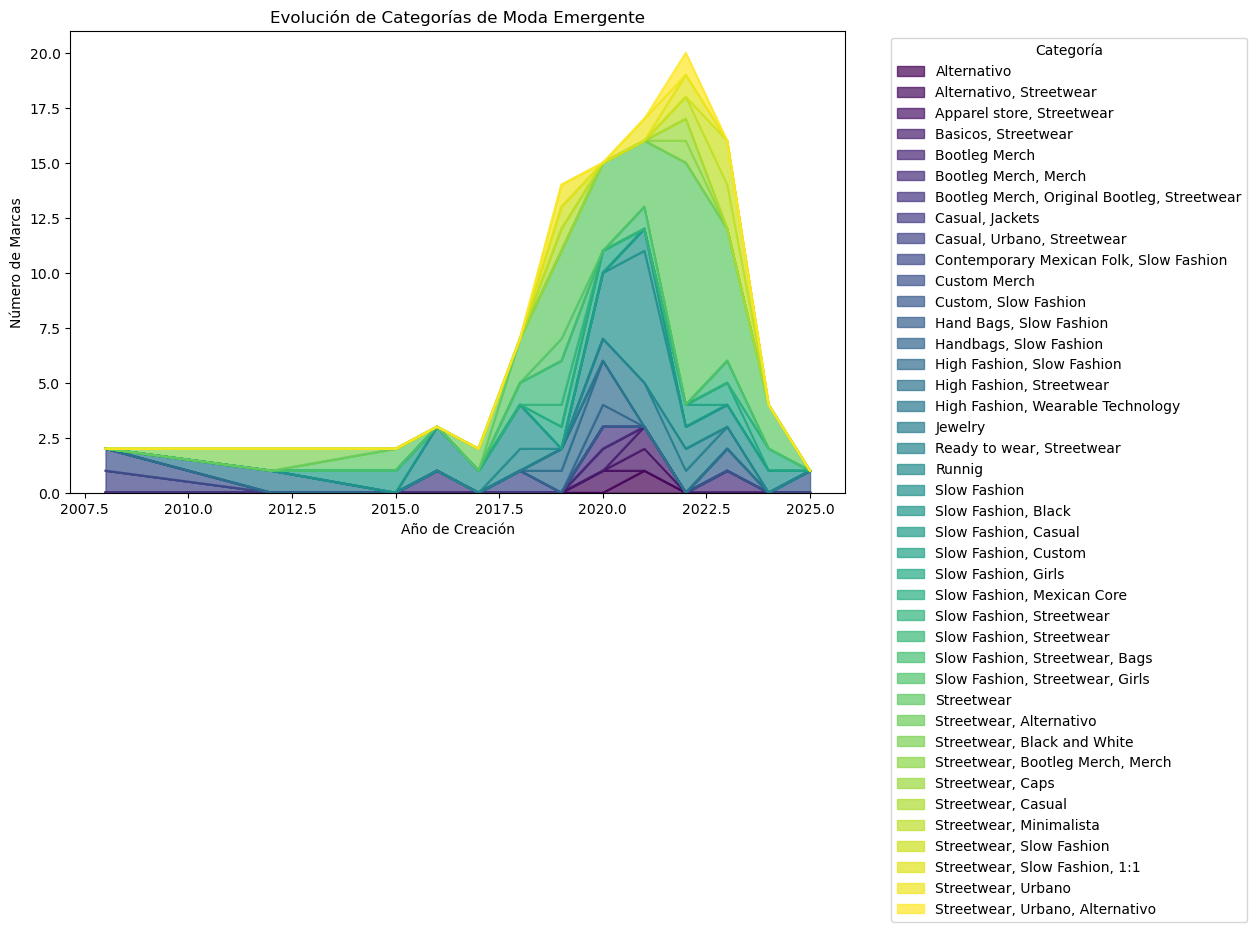

In [122]:
pivot_categoria = df.pivot_table(index="ano_creacion", columns="categoria", aggfunc="size", fill_value=0)

# Gráfico de evolución de categorías
pivot_categoria.plot(kind="area", stacked=True, figsize=(10,6), colormap="viridis", alpha=0.7)
plt.title("Evolución de Categorías de Moda Emergente")
plt.xlabel("Año de Creación")
plt.ylabel("Número de Marcas")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [208]:
nuevos_datos = pd.DataFrame([{'id_marca': '118', 'nombre': 'SABRINA OL', 'ano_creacion': '2019', 'categoria': 'Slow Fashion', 'ciudad_base': 'Ciudad de México', 'disponibilidad':'Ambos', 'precios_promedio':'2732', 'seguidores_ig' : '6624', 'seguidores_tt': '302'}])
df = pd.concat([df, nuevos_datos], ignore_index=True)


In [211]:
df.head()

,id_marca,nombre,ano_creacion,categoria,ciudad_base,disponibilidad,precios_promedio,seguidores_ig,seguidores_tt
0,1,Palida studios,2019,"Streetwear, Urbano","Nezahualcoyotl, Estado de México",Ambos,750.0,12400,1914
1,2,Tony Delfino,2008,"Casual, Urbano, Streetwear","Ciudad de México, Centro",Ambos,1100.0,114000,1870
2,3,Wavy,2021,"Streetwear, Urbano",Ciudad de México,Ambos,700.0,10000,23000
3,4,Egoista,2022,"Streetwear, Urbano, Alternativo","Ecatepec, Estado de México",Ambos,600.0,24500,34600
4,5,Laminero,2022,Streetwear,Ciudad de México,Online,700.0,624,2717


In [213]:
df.to_csv('dataF.csv', index=False)